In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np 

data set upload

In [9]:

from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("{} train samples and {} test samples\n".format(len(x_train), len(x_test)))
print("train samples shape:", x_train.shape)
print("train labels shape:", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 728s 4us/step
50000 train samples and 10000 test samples

train samples shape: (50000, 32, 32, 3)
train labels shape: (50000, 1)


give numbers to the object

In [10]:
class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

#plot the samples alongwith their class names

<function matplotlib.pyplot.show(close=None, block=None)>

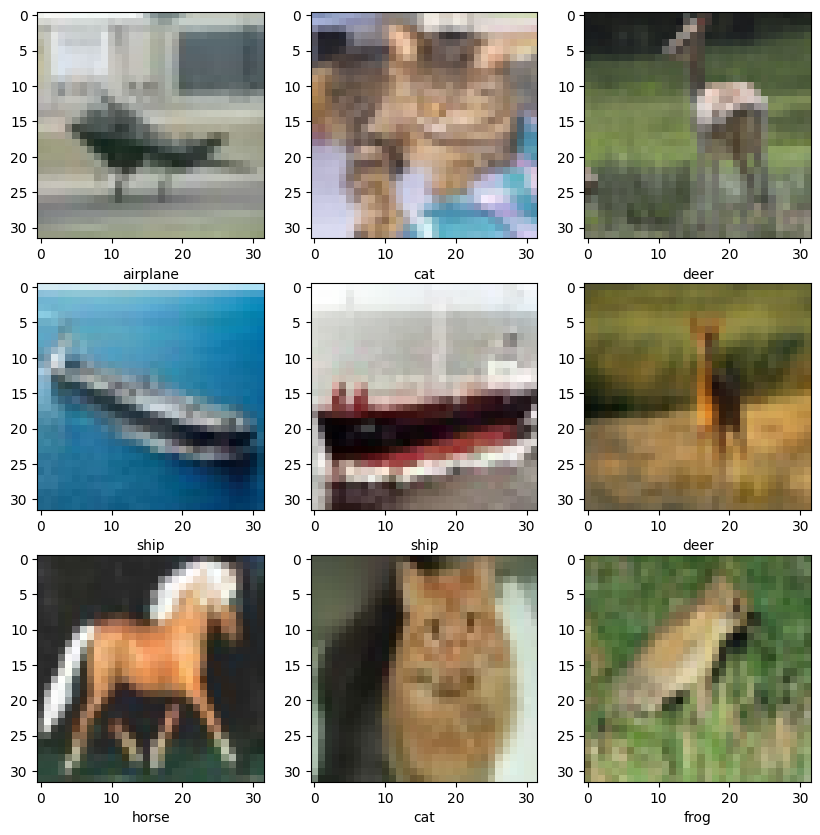

In [13]:
#select a random set of 9 images
idx=np.random.randint(len(x_train)-9)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i+idx])
    plt.xlabel(class_names[(y_train[i+idx][0])])

plt.show

normalize sample

In [14]:
print("before normalization:\n",x_train[0][0][0])

before normalization:
 [59 62 63]


In [15]:
x_train=x_train/255.
x_test=x_test/255.
print("after normalization:\n",x_train[0][0][0])

after normalization:
 [0.23137255 0.24313725 0.24705882]


one hot encode label

In [18]:
print("before one hot:")
print("class {} represents a {}".format(y_train[0][0], class_names[y_train[0][0]]))

before one hot:
class 6 represents a frog


In [19]:
from keras.utils import to_categorical

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

print("after one hot:")
print("Class {} represents a {}".format(y_train[0],class_names[np.argmax(y_train[0])]))

after one hot:
Class [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] represents a frog


defining neural network

In [20]:
from tensorflow.keras import Sequential, layers

def build_model():
    model = Sequential()
    model.add(layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2))) 
    model.add(layers.Conv2D(32, 5, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))  
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    model.add(layers.Softmax())
    
    model.compile(
        optimizer ='adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'])
    return model

In [21]:
model=build_model()
model.summary()

C:\Users\Keshavraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,314 (618.41 KB)

 Trainable params: 158,314 (618.41 KB)

 Non-trainable params: 0 (0.00 B)

traing and performing model

In [22]:
history=model.fit(x_train,y_train,epochs=12)
model.save('baseline.keras')

print("\nintial accuracy:{}|latest accuracy:{}".format(history.history["accuracy"][0],history.history["accuracy"][-1]))
print("initial loss:{}|latest loss:{}".format(history.history["loss"][0],history.history["loss"][-1]))

Epoch 1/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - accuracy: 0.4014 - loss: 1.6538
Epoch 2/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6176 - loss: 1.0783
Epoch 3/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6708 - loss: 0.9369
Epoch 4/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7087 - loss: 0.8332
Epoch 5/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.7346 - loss: 0.7589
Epoch 6/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.7506 - loss: 0.7082
Epoch 7/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7678 - loss: 0.6570
Epoch 8/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7889 - loss: 0.6014
Epoch 9/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.8059 - loss: 0.5477
Epoch 10/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8250 - loss: 0.4977
Epoch 11/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8358 - loss: 0.4580
Epoch 12

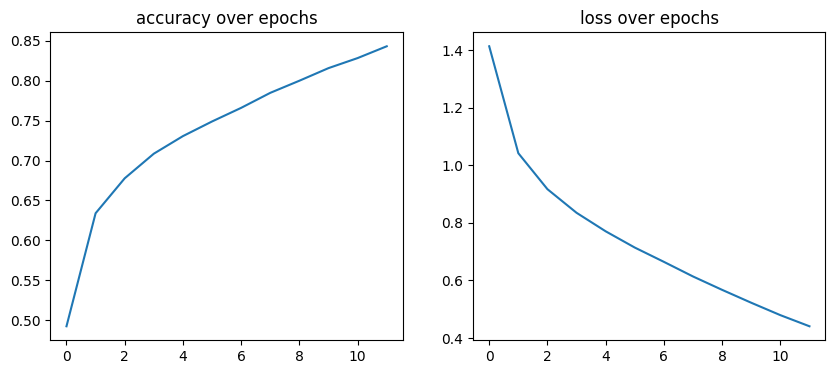

In [23]:
fig, axis = plt.subplots(1, 2, figsize=(10,4)) 
# plot accuracy
axis[0].plot(history.history["accuracy"])
axis[0].set_title("accuracy over epochs")
# plot loss
axis[1].plot(history.history["loss"])
axis[1].set_title("loss over epochs")
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\ntest accuracy score:', test_acc)

313/313 - 4s - 14ms/step - accuracy: 0.6977 - loss: 0.9944

test accuracy score: 0.697700023651123


check prediction for each classes

In [27]:
predictions = model.predict(x_test)
# fetch probabilities for each class
print("\nprediction probabilities per class:\n", predictions[0])
# fetch class with the highest probability
print("\npredicted class:", np.argmax(predictions[0]))
print("actual class:", np.argmax(y_test[0]))
# fetch readable class name
print("predicted class name:", class_names[np.argmax(predictions[0])])
# compare with original label
print("actual class name:", class_names[np.argmax(y_test[0])])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step

prediction probabilities per class:
 [6.0465220e-05 9.4300722e-06 4.8739434e-04 9.0852463e-01 2.0405554e-04
 8.9163706e-02 6.7199097e-04 3.5360338e-06 8.6560537e-04 9.0951153e-06]

predicted class: 3
actual class: 3
predicted class name: cat
actual class name: cat


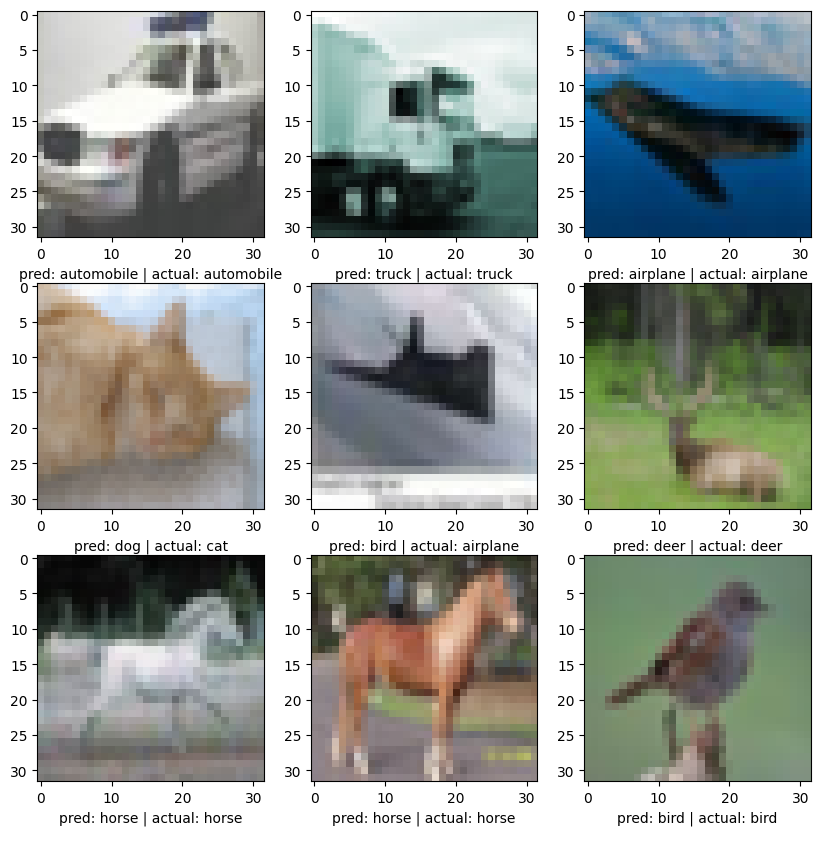

In [28]:
idx = np.random.randint(len(x_test) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each test image along with its prediction
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_test[i + idx]) 
    plt.xlabel("pred: {} | actual: {}\n".format(class_names[np.argmax(predictions[i + idx])], class_names[np.argmax(y_test[i + idx])]))

# display results
plt.show()